# Изучение закономерностей, определяющих успешность игр

# Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
У нас есть данные до 2016 года. Представим, что сейчас декабрь 2016 г., и необходимо спаланировать кампанию на 2017-й. Нужно отработать принцип работы с данными. 

## Изучение данных

In [1]:
import pandas as pd #импортировали библиотеку pandas
import numpy as np #импорт библиотеки с математическими функциями
import matplotlib.pyplot as plt #импорт библиотеки для построения графиков
from scipy import stats as st 
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/datasets/games.csv')#прочитали файл и сохранили в переменной data
display(data.head(20))# выводим на экран первые 20 строк таблицы
data.info() #получаем сводную информацию о таблице

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод 

Исходная таблица состоит из 16715 строк и 11 столбцов. В столбцах Name, Year_of_Release,Genre,Critic_Score,User_Score,Rating есть пропуски, с которыми надо поработать. В столбце Year_of_Release следует изменить тип данных на дату, а в столбце User_Score тип данных на числовой. Название столбцов привести к нижнему регисту в соответствии с хорошим стилем.

## Подготовка данных

In [2]:
# переводим название столбцов в нижний регистр
data.columns = data.columns.str.lower() 

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# меняем тип данных в столбце year_of_release на дату, так как это год 
data['year_of_release'] = pd.to_datetime(data['year_of_release'] , format = '%Y')
data['year_of_release'] = pd.DatetimeIndex(data['year_of_release']).year

In [4]:
# проверим уникальные значения столбца user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце user_score есть значение 'tbd', а оценка пользователя измеряется от 1 до 10. Возможно данная аббревиатура означает, что оценка отсутствует. Поменяем 'tbd' на привычный nan, который уже есть в этом столбце. Тип данных числовой, так как оценка пользователей-это числовое значение

In [5]:
# меняем тип данных в столбце user_score на числовой
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')
data['user_score'] = data['user_score'].astype(float)

In [6]:
# проверяем изменения в типе данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [7]:
# считаем количетство пропусков в каждом столбце
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Как уже раньше мы видели, в исходной таблице есть пропуски в столбцах name, year_of_release,genre,critic_score,user_score,rating. Пропуски могли возникнуть, например из-за простого человеческого фактора, пропустили строку, что-то не заполнили, или возможно было несколько источников сбора данных и при объединение в одну таблице, данные потерялись, или просто данные отсутствуют.   
В столбцах name, year_of_release,genre считаю, что пропусков мало, можно удалить строки, где есть пропуски. А в столбцах  critic_score,user_score,rating пропуски можно оставить, предполагаю, что оценки критика, пользователей или рейтинга просто нет у каких-то игр.

In [8]:
# удаляем строки с пропусками в столбцах  name, year_of_release,genre
data = data.dropna(subset=['name','year_of_release','genre'])

In [9]:
# считаем количетство пропусков в каждом столбце после удаления
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

В столбцах critic_score, user_score, rating пропуски оставляем, нулями мы заполнить не можем, так как это изменит результат дальнейшего статистического анализа.

In [10]:
data.describe()# проверяем описательную статистику по всем числовым столбцам

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


По описательной статистике можно увидеть, что в данных нереальных значений, максимальное значение года 2016, что действительно так и должно быть, оценка критиков может достигать 100, унас максимум 98, пользовательский рейтинг от 0 до 10 - значения входят 
в этот интервал.

In [11]:
# проверяем количество дубликатов
data.duplicated().sum()

0

Дубликатов нет

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец

In [12]:
#считаем суммарные продажи во всех регионах
data['sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
13832,Samurai Warriors 2: Empires,X360,2007.0,Action,0.03,0.00,0.01,0.00,53.0,8.5,T,0.04
891,X-Men Legends,PS2,2004.0,Role-Playing,1.00,0.72,0.00,0.21,79.0,8.5,T,1.93
7485,BeyBlade VForce: Super Tournament Battle,GC,2002.0,Action,0.16,0.04,0.00,0.01,33.0,7.5,E,0.21
239,Guitar Hero III: Legends of Rock,X360,2007.0,Misc,3.19,0.91,0.01,0.42,85.0,7.9,T,4.53
12137,The Book of Unwritten Tales 2,PS4,2015.0,Adventure,0.00,0.06,0.00,0.01,63.0,8.6,NaN,0.07
7759,Great Phoenix Wright: Ace Attorney - Naruhodou...,3DS,2015.0,Action,0.00,0.00,0.19,0.00,NaN,NaN,NaN,0.19
11561,Crush,PSP,2007.0,Puzzle,0.07,0.00,0.00,0.01,83.0,9.0,E10+,0.08
2321,Blitz: The League,PS2,2005.0,Sports,0.74,0.03,0.00,0.12,76.0,8.0,M,0.89
6310,Sherlock Holmes: Crimes & Punishments,PS4,2014.0,Adventure,0.09,0.14,0.00,0.04,NaN,NaN,NaN,0.27
9207,Transformers: Devastation,XOne,2015.0,Action,0.09,0.04,0.00,0.01,75.0,7.9,T,0.14


### Вывод

Изучили и обработали исходные данные. Изменили тип данных, убрали лишние пропуски, посчитали суммарные продажи по всем регионам. Данные готовы для дальнейшего анализа.

## Исследовательский анализ

Cколько игр выпускалось в разные годы?

In [13]:
# формируем сводную таблицу с суммарными продажами по годам
data_sales_per_year = data.pivot_table(index='year_of_release', values='sales',aggfunc='sum')
data_sales_per_year.head(10)

,sales
year_of_release,
1980.0,11.38
1981.0,35.68
1982.0,28.88
1983.0,16.80
1984.0,50.35
1985.0,53.95
1986.0,37.08
1987.0,21.70
1988.0,47.21


Text(0, 0.5, 'Продажи, млн копий')

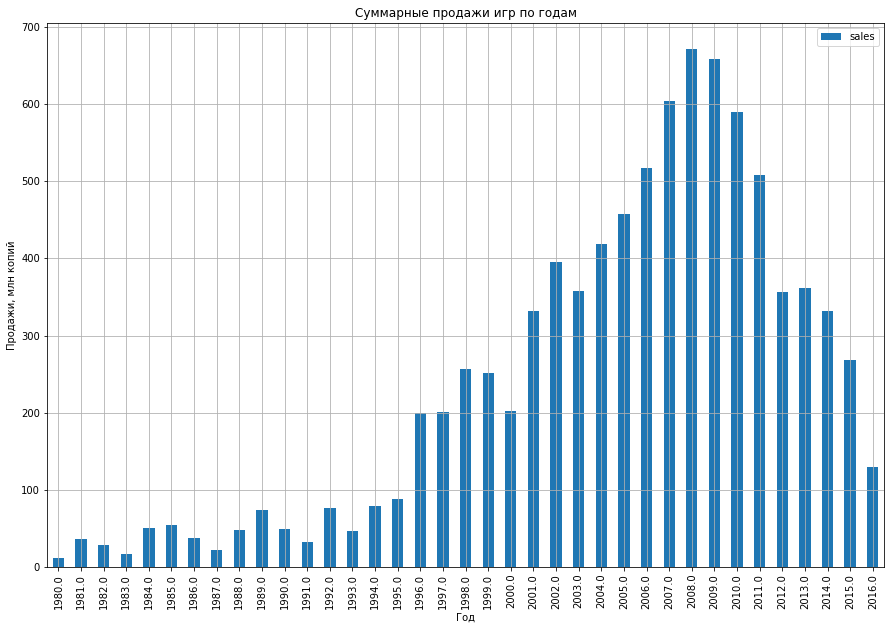

In [14]:
# строим график по суммарным продажам по годам
data_sales_per_year.plot(kind = 'bar',grid=True,figsize=(15,10))
plt.legend()
plt.title('Суммарные продажи игр по годам')
plt.xlabel('Год')
plt.ylabel('Продажи, млн копий')

В таблице представлены продажи с 1980 по 2016. Пик роста продаж игр приходится на 2007-2010 года. Для дальйнейшего анализа нам не важны данные за все периоды, сразу можно сказать, что информацию за прошлый век мы учитывать не будем. Далее определим актуальный период.

Выбираем платформы с наибольшими суммарными продажами и строим распределение по годам

In [15]:
# формируем сводную таблицу по суммарным продажм по платформам
top_platforms = data.pivot_table(index='platform', values='sales',aggfunc='sum').sort_values(by='sales',ascending=False)
top_platforms = top_platforms.query('sales>200') # выбираем продажи от 200 млн
top_platforms

,sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Text(0, 0.5, 'Продажи, млн копий')

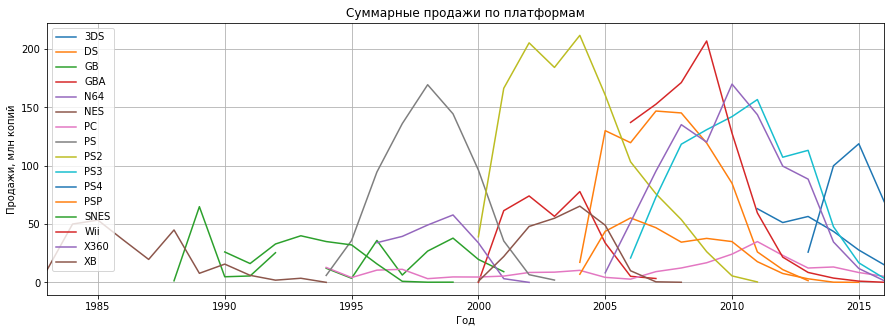

In [16]:
# по платформам с наибольшими продажами строим график
top_platforms = data.query('platform in ["PS2", "X360","PS3","Wii","DS","PS","PS4","GBA","PSP","3DS","PC","GB","XB","NES","N64","SNES"]')
top_platforms.pivot_table(index='year_of_release', columns = 'platform',values='sales',aggfunc='sum').plot(grid=True, figsize=(15, 5))
plt.legend()
plt.title('Суммарные продажи по платформам')
plt.xlabel('Год')
plt.ylabel('Продажи, млн копий')

Наибольшими суммарными продажами будем считать те, у кого продажи больше 200 млн проданных копий. Лидер продаж PS2. Также мы видим, что с выходном новый версии PS, продажи падают. На 2016 год еще в продаже PS4, 3DS,хотя продажи падают, также возможно минимальны продажи PS3,Wii,X360.

In [17]:
# считаем среднюю продолжительность жизни платформы
platform_lifetime = top_platforms.pivot_table (index = ['platform', 'year_of_release'], values = 'sales', aggfunc = 'sum')
platform_lifetime = platform_lifetime.pivot_table (index = 'platform', values = 'sales', aggfunc = 'count')
platform_lifetime.columns = ['years']
print ('Средний срок жизни платформы:', platform_lifetime.mean())


Средний срок жизни платформы: years    10.875
dtype: float64


Среднее время жизни платформ -  11 лет.  Но на графике мы видим, что  примерно с 2013 года продажи для большинства платформ падают, а для некоторых поднимаются. И на 2016 год многие игры уже не актуальны и не продаются.Поэтомк за актальный период возьмем игры, год выхода, которых с 2013 года. Тогда в актуальный период не попадут платформы, которые на 2016 год имеют очень мало продаж, но имеют много в 2008-2010, что повлияет на пользовательские портреты


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Text(0, 0.5, 'Продажи, млн копий')

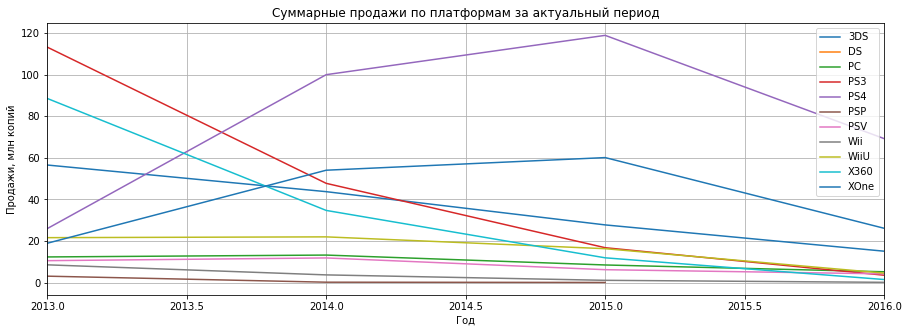

In [18]:
df_actual = data.query('year_of_release>=2013') # срез данных по годом, берем от 2013
display(df_actual)
df_actual.pivot_table(index='year_of_release', columns = 'platform',values='sales',aggfunc='sum').plot(grid=True, figsize=(15, 5))
plt.legend()
plt.title('Суммарные продажи по платформам за актуальный период')
plt.xlabel('Год')
plt.ylabel('Продажи, млн копий')

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

(0, 1)

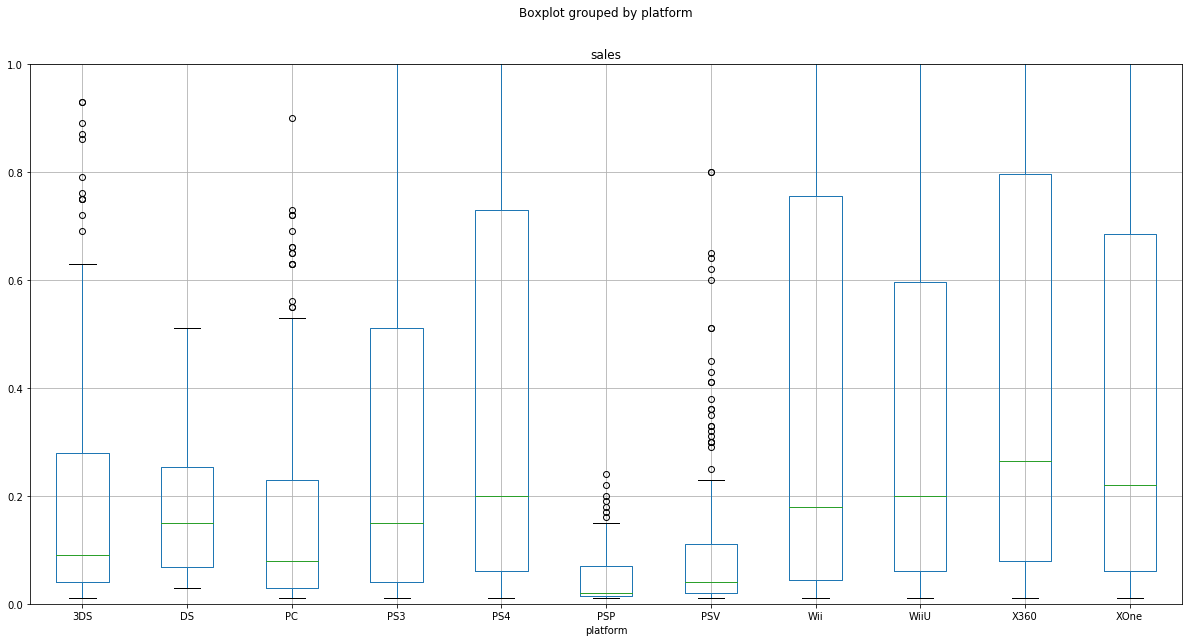

In [19]:
df_actual.boxplot(column='sales',by='platform',figsize=(20,10))
plt.ylim(0,1)


На графике мы видим распределение продаж. Медианные продажи выше всего у PS4,X360,XOne,WiiU

Посмотрим как на продажи  популярных платформы влияют отзывы пользователей и критиков

,sales,critic_score,user_score
sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


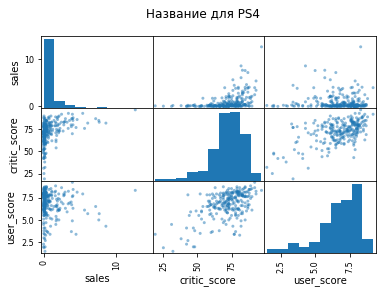

,sales,critic_score,user_score
sales,1.000000,0.350345,-0.011742
critic_score,0.350345,1.000000,0.520946
user_score,-0.011742,0.520946,1.000000


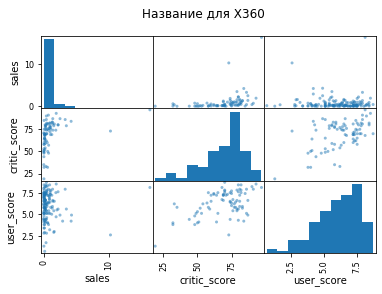

,sales,critic_score,user_score
sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


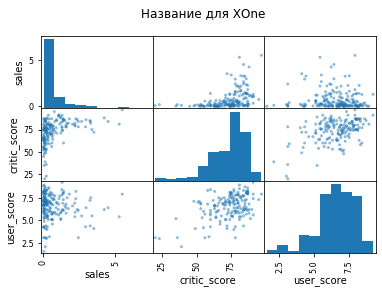

,sales,critic_score,user_score
sales,1.000000,0.376415,0.419330
critic_score,0.376415,1.000000,0.721313
user_score,0.419330,0.721313,1.000000


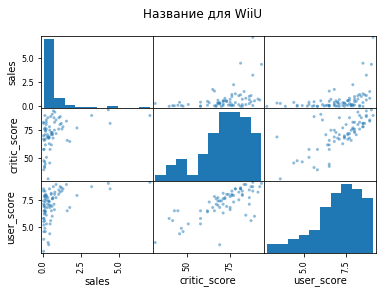

In [40]:
# выделяем популярные платформы 
popular_platform = ['PS4','X360','XOne','WiiU']
for i in popular_platform:
    display(df_actual.query('platform==@i')[['sales','critic_score','user_score']].corr())
#     plt.show()
    pd.plotting.scatter_matrix(df_actual.query('platform==@i')[['sales','critic_score','user_score']])
#     Код ревьюера
    plt.suptitle('Название для {}'.format(i))
    plt.show()
    

Линейной зависимости между продажами и оценкой критиков и пользователей не наблюдается, как так коэффициент корреляции по модули даже не доходит до значения 0.5. 

Посмотрите на общее распределение игр по жанрам

In [21]:
# строим сводную таблицу по жанрам и сортируем в порядке убывания продажи
df_actual_genre = df_actual.pivot_table(index='genre', values='sales',aggfunc='sum').sort_values(by='sales',ascending=False)
df_actual_genre


,sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


Text(0.5, 1.0, 'Медианные продажи видеоигр по жанрам')

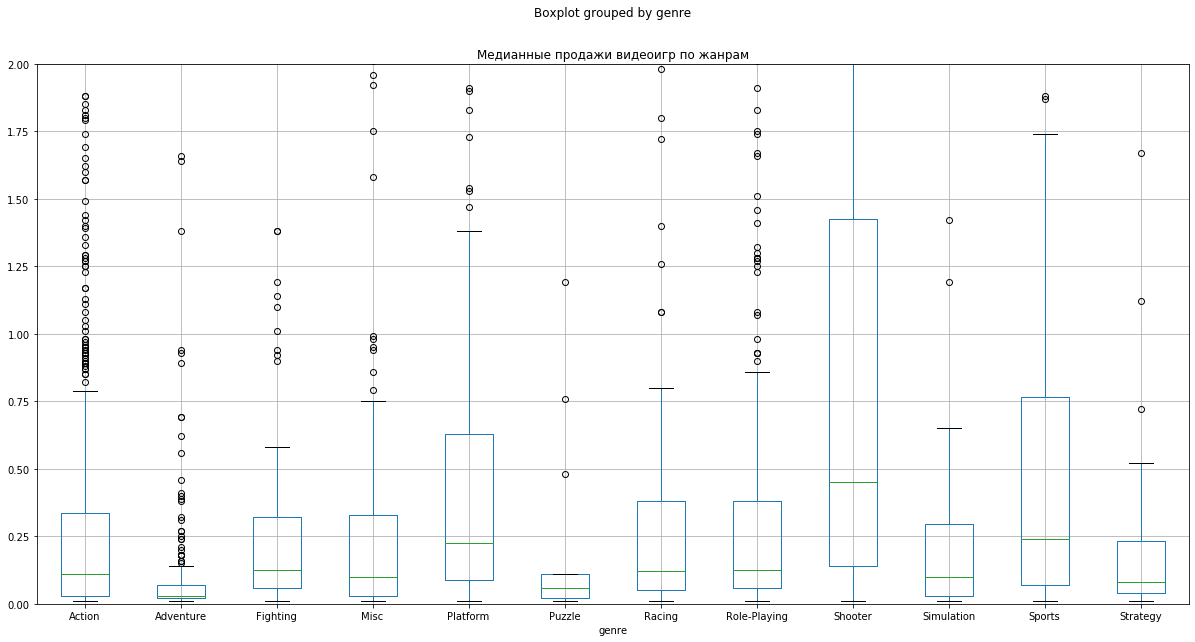

In [22]:
# смотрим распределение по жанрам на круговой диаграмме
df_actual.boxplot(column='sales',by='genre',figsize=(20,10))
plt.ylim(0,2)
plt.title('Медианные продажи видеоигр по жанрам')

Самые популярные и прибыльные жанры misc, sports, shooter. Это динамичные игры. Менее прибыльные более спокойные жанры игр puzzle, adventure.

## Портрет пользователя по регионам

Самые популярные платформы (топ-5) для пользователя каждого региона (NA, EU, JP)

In [23]:
# популярные платформы в Северной Америке
df_na_sales = df_actual.pivot_table(index='platform', values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)
df_na_sales.head()



,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


In [24]:
# популярные платформы в Европе
df_eu_sales = df_actual.pivot_table(index='platform', values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)
df_eu_sales.head()

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


In [25]:
# популярные платформы в Японии
df_jp_sales = df_actual.pivot_table(index='platform', values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)
df_jp_sales.head()

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


Мы видим, что во всех регионах в топ 5 платформ PS4, 3DS,PS3. Также можно отметить, что продажи по платформам в Северной Америки и Европе схожи, а Япония немного отличается. можно предположить, что это связано с разницей в менталитете.

Самые популярные жанры (топ-5) для пользователя каждого региона (NA, EU, JP)

In [26]:
# популярные жанры в Северной Америке
df_na_genre = df_actual.pivot_table(index='genre', values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)
df_na_genre.head()

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


In [27]:
# популярные жанры в Европе
df_eu_genre = df_actual.pivot_table(index='genre', values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)
df_eu_genre.head()

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


In [28]:
# популярные жанры в Японии
df_jp_genre = df_actual.pivot_table(index='genre', values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)
df_jp_genre.head()

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


В распределении по жанрам тоже можно отметить, что топ 5 у Северной Америки и Европы одинаковый, а у Японии отличается. У Японии на первом месте жанр ролевых игр, что тоже указывает на разницу в менталитетах. Япония - родина аниме, страна высоких технологий и роботов. 

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

(0, 1)

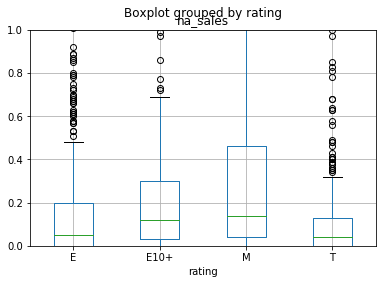

In [29]:
# влияние рейтинга на продажи в Северной Америке
df_actual.boxplot('na_sales',by='rating')
plt.ylim(0,1)

(0, 1)

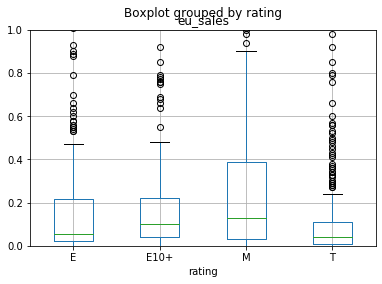

In [30]:
# влияние рейтинга на продажи в Европе
df_actual.boxplot('eu_sales',by='rating')
plt.ylim(0,1)

(0, 1)

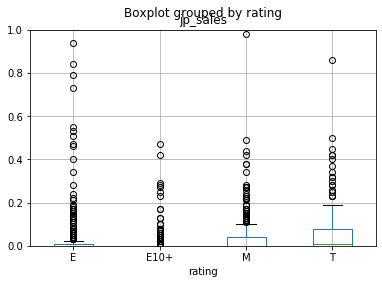

In [31]:
# влияние рейтинга на продажи в Японии
df_actual.boxplot('jp_sales',by='rating')
plt.ylim(0,1)

In [32]:
jp_sales_pivot = df_actual.pivot_table(index='rating',values='jp_sales',aggfunc='median')
jp_sales_pivot

,jp_sales
rating,
E,0.00
E10+,0.00
M,0.00
T,0.01


По данным графикам мы тоже видим, что японский рынок видеоигр отличается от Северной америки и Европы. В Японии мы видим медианные продажи только для рейтинга Т, и то они очень маленькие. По остальным рейтингам продаж нет. Возможно  в Японии данный рейтинг почти не используется. В Северной Америке и Европе лидирует по продажам игры с рейтингом М и Е10+.

## Проверка гипотез

При подготовке данных мы оставляли пропуски в столбцах user_score,critic_score, rating. Для проверки гипотез нам понадобится столбец user_score и для проведения t-test мы должны учесть это момент, так как это исказит проведение стат-теста.

Переходим к проверке гипотез

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

$H_0$ : Средние пользовательские рейтинги платформ Xbox One и PC равны 

$H_1$ : Средние пользовательские рейтинги платформ Xbox One и PC не равны

In [33]:
xone = df_actual.query('platform=="XOne"')
pc = df_actual.query('platform=="PC"')

In [34]:
xone_user_score = xone['user_score'] # выбираем столбец с пользовательским рейтингом
pc_user_score = pc['user_score'] # выбираем столбец с пользовательским рейтингом
alpha = .05 #критический уровень статистической значимости
results = st.ttest_ind(xone_user_score,pc_user_score,equal_var = False,nan_policy='omit') #проверяем гипотезу о равенстве средних двух независимых совокупностей,без пропусков
print('p-значение:', results.pvalue) 

if results.pvalue < alpha: #сравниваем получившееся p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1475959401343003
Не получилось отвергнуть нулевую гипотезу


In [35]:
# посчитаем средний пользовательский рейтинг по двум платформам
xone_user_score_ave = xone['user_score'].mean() 
pc_user_score_ave = pc['user_score'].mean()
print(xone_user_score_ave)
print(pc_user_score_ave)

6.521428571428572
6.269677419354839


Проверяя гипотезу о равенстве средних двух генеральных совокупностей, не получилось отвергнуть нулевую гипотезу. То есть средние пользовательские рейтинги платформ Xbox One и PC равны. Это мы проверили сосчитав среднее по столбцу пользовательских оценок по 2 платформам, их значение почти равны.

Средние пользовательские рейтинги жанров Action и Sports разные

$H_0$ : Средние пользовательские рейтинги платформ жанров Action и Sports равны 

$H_1$ : Средние пользовательские рейтинги жанров Action и Sports не равны

In [36]:
action_genre = df_actual.query('genre=="Action"')
sports_genre = df_actual.query('genre=="Sports"')


In [37]:
action_user_score = action_genre['user_score']
sports_user_score = sports_genre['user_score']
alpha = .05 #критический уровень статистической значимости
results = st.ttest_ind(action_user_score,sports_user_score,equal_var = False,nan_policy='omit') #проверяем гипотезу о равенстве средних двух независимых совокупностей,без пропусков
print('p-значение:', results.pvalue) 

if results.pvalue < alpha: #сравниваем получившееся p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.446003970070351e-20
Отвергаем нулевую гипотезу


In [38]:
# посчитаем средний пользовательский рейтинг по двум жанрам
action_user_score_ave = action_genre['user_score'].mean()
sports_user_score_ave = sports_genre['user_score'].mean()
print(action_user_score_ave)
print(sports_user_score_ave)

6.837532133676093
5.238124999999999


При проверке гипотез о равенстве средние пользовательском рейтинге жанров Action и Sports, мы также отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports разные, чем доказали это, посчитав среднее.

## Общий вывод

На основе предоставленных данных мы видим, что рынок видеоигр разнообразен. Пик популярности пришелся на 2007-2010 года. Самой прибыльной игрой является PS разных версий.С выходом новых версий игр, продажи старых версий со временем сходят на нет. По регионам рынок видеоигр отличается, если в Северной Америке и Европе схожи вкусы пользователей, то у пользоватали видеоигр в Японии он другой, как по платформам,  так и по жанрам. В Северной Америке нужно делать акцент на жанрах Action, Sports,Shooter,в Японии - Role-playing, Action. В 2016 года в продаже остаются PS4, 3DS,WiiU,X360,XOne. И они популярны во всех странах, только в Японии чаще выбирают 3DS, в Северной Америке и в Европе PS4,XOne.  